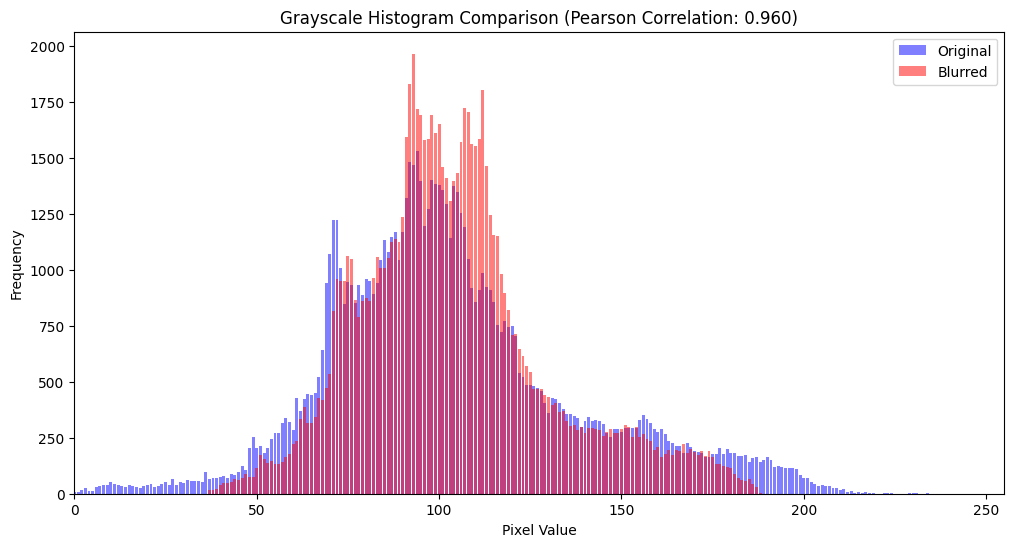

Pearson correlation coefficient: 0.960


In [1]:
# **Bootcamp 2025** _Image Processing with Python_
# This script demonstrates how to read an image, apply Gaussian blur, and create a grayscale histogram using Python.
# Made by William Meehan
# This script requires the Pillow and Matplotlib libraries
# have python be able to read an Image
# python version 3.10 
# using GitHub Copilot to write code

# Part 1: Installing Required Libraries
from PIL import Image, ImageTk, ImageFilter
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog # Create the main window
from PIL import ImageFilter

def open_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Open and display the original image
        img = Image.open(file_path)
        img.thumbnail((400, 400))  # Resize the image to fit the window
        img_tk = ImageTk.PhotoImage(img)

        # Update the label with the original image, if label exists and root window is not destroyed
        try:
            if label_original.winfo_exists():
                label_original.config(image=img_tk)
                label_original.image = img_tk
        except Exception as e:
            print("Could not update label:", e)

        # Apply Gaussian blur to the selected image
        blurred = img.filter(ImageFilter.GaussianBlur(radius=7))
        blurred.thumbnail((400, 400))  # Resize the blurred image to fit the window
        blurred_tk = ImageTk.PhotoImage(blurred)
        try:
            if label_blurred.winfo_exists():
                label_blurred.config(image=blurred_tk)
                label_blurred.image = blurred_tk
        except Exception as e:
            print("Could not update label:", e)

        # Save the blurred image
        blurred.save('Blurred_from_gui.png')

        # Convert images to grayscale
        gray_original = img.convert("L")
        gray_blurred = blurred.convert("L")
        # Convert to numpy arrays
        array_original = np.array(gray_original)
        array_blurred = np.array(gray_blurred)
        # Compute histograms
        hist_original, _ = np.histogram(array_original.flatten(), bins=256, range=(0, 256))
        hist_blurred, _ = np.histogram(array_blurred.flatten(), bins=256, range=(0, 256))
        # Calculate Pearson correlation
        if np.std(hist_original) > 0 and np.std(hist_blurred) > 0:
            correlation = np.corrcoef(hist_original, hist_blurred)[0, 1]
        else:
            correlation = 0.0

        # Plot both histograms
        plt.figure(figsize=(12, 6))
        plt.bar(range(256), hist_original, color='blue', alpha=0.5, label='Original')
        plt.bar(range(256), hist_blurred, color='red', alpha=0.5, label='Blurred')
        plt.title(f'Grayscale Histogram Comparison (Pearson Correlation: {correlation:.3f})')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])
        plt.legend()
        plt.show()
        print(f"Pearson correlation coefficient: {correlation:.3f}")

# Create the main window
root = tk.Tk()
root.title("Image Input GUI")
button = tk.Button(root, text="Select Image", command=open_image)
button.pack(pady=20)

# Create labels to display the original and blurred images
label_original = tk.Label(root)
label_original.pack(pady=20)
label_blurred = tk.Label(root)
label_blurred.pack(pady=20)

def calculate_histogram_correlation():
    # Open file dialog to select an image file
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Load and process original image
        img = Image.open(file_path)
        gray_original = img.convert("L")
        array_original = np.array(gray_original)
        hist_original, _ = np.histogram(array_original.flatten(), bins=256, range=(0, 256))
        
        # Process blurred image
        blurred = img.filter(ImageFilter.GaussianBlur(radius=7))
        gray_blurred = blurred.convert("L")
        array_blurred = np.array(gray_blurred)
        hist_blurred, _ = np.histogram(array_blurred.flatten(), bins=256, range=(0, 256))
        
        # Calculate Pearson correlation
        if np.std(hist_original) > 0 and np.std(hist_blurred) > 0:
            correlation = np.corrcoef(hist_original, hist_blurred)[0, 1]
        else:
            correlation = 0.0
        
        # Plot histograms and correlation
        plt.figure(figsize=(12, 6))
        plt.bar(range(256), hist_original, color='blue', alpha=0.5, label='Original')
        plt.bar(range(256), hist_blurred, color='red', alpha=0.5, label='Blurred')
        plt.title(f'Histogram Comparison (Pearson Correlation: {correlation:.3f})')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])
        plt.legend()
        plt.show()
        
        print(f"Pearson correlation coefficient: {correlation:.3f}")

root.mainloop()


